# Linear Regression


## Problem Statement


Apply the **Linear Regression** to predict the median house price for **California House Price Dataset**.


### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### [California House Price Dataset Characteristics](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)


- **Number of Instances:** $20640$

- **Number of Attributes:** $9$ numeric, $8$ predictive attributes and the target

- **Attribute Information:**

  - `MedInc`: median income in block group
  - `HouseAge`: median house age in block group
  - `AveRooms`: average number of rooms per household
  - `AveBedrms`: average number of bedrooms per household
  - `Population`: block group population
  - `AveOccup`: average number of household members
  - `Latitude`: block group latitude
  - `Longitude`: block group longitude
  - `MedHouseVal`: median house value

- **Missing Attribute Values:** None


### Load dataset


In [2]:
housing = fetch_california_housing(as_frame=True)

In [3]:
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Plotting


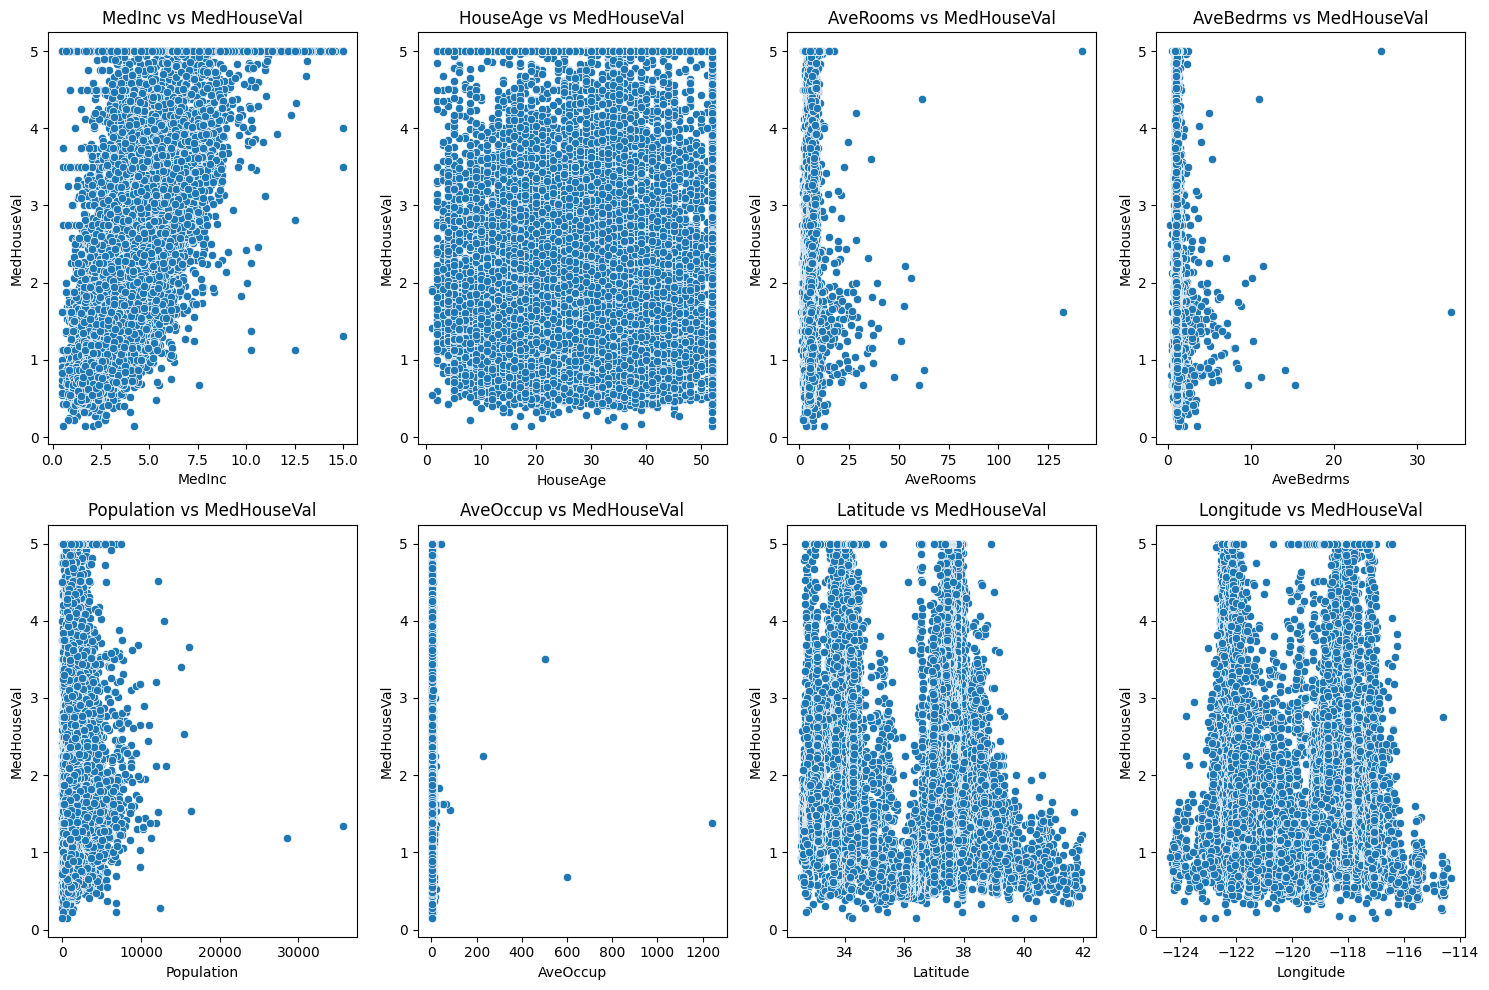

In [4]:
features = df.columns[:-1]
target = "MedHouseVal"

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features[:8], 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(x=feature, y=target, data=df)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")

plt.tight_layout()
plt.show()

### Splitting the train-test data


In [5]:
X = df.iloc[:, :-1]
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Train the model


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Predict the Model


In [7]:
y_pred = model.predict(X_test)

### Evaluation metrics


#### Mean Squared Error (MSE)


In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.5559


#### Training accuracy


In [9]:
train_accuracy = model.score(X_train, y_train)
print(f"Testing Accuracy: {train_accuracy*100:.2f}%")

Testing Accuracy: 61.26%


#### Testing accuracy


In [10]:
test_accuracy = model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

Testing Accuracy: 57.58%


### Visualize Regression


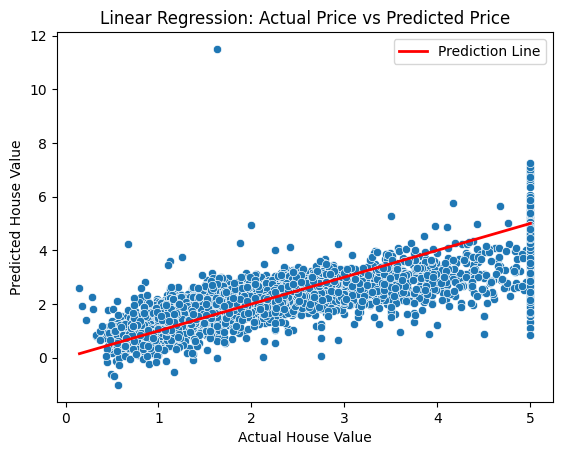

In [11]:
plot_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
sns.scatterplot(x="Actual", y="Predicted", data=plot_df)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linewidth=2,
    label="Prediction Line",
)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Linear Regression: Actual Price vs Predicted Price")
plt.legend()
plt.show()